<a href="https://colab.research.google.com/github/shila121/datasets/blob/main/iris1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import dataset
data = pd.read_csv('iris.csv')
print(data.head())
print(data.columns)

# Unnamed: 0 is for indexing,so drop this column
data.drop('Unnamed: 0',axis=1,inplace=True)
print(data.Species.value_counts())

# predictors = ['Sepal.Length', 'Sepal.Width', 'Petal.Length','Petal.Width']
# target = ['Species']
# apply label encoder on the target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])
print(data.head())



   Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           1           5.1          3.5           1.4          0.2  setosa
1           2           4.9          3.0           1.4          0.2  setosa
2           3           4.7          3.2           1.3          0.2  setosa
3           4           4.6          3.1           1.5          0.2  setosa
4           5           5.0          3.6           1.4          0.2  setosa
Index(['Unnamed: 0', 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width', 'Species'],
      dtype='object')
setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  Species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0 

In [ ]:
# now we will carry out hypothesis testing:
# Null Hypothesis:there is no relationship between the predictors and the target
# Alternate Hypothesis:there is relationship between the predictors and the target
from statsmodels.stats import weightstats as stests

cols = ['Sepal.Length', 'Sepal.Width', 'Petal.Length','Petal.Width']
significant_cols = []
for i in cols:
  p_val = stests.ztest(data[i],data['Species'])
  p = p_val[1]
  print('columns:-->',i)
  print("p:",p)
  if p < 0.05:
    status = 'Reject Null Hypothesis,Significant predictors'
    print("status:",status)
    significant_cols.append(i)
  else:
    status = 'Accept Null Hypothesis,Insignificant predictor'
    print("status:",status)
  print("------------------------------------------------------------------")

print("significant predictors:",significant_cols)



columns:--> Sepal.Length
p: 0.0
status: Reject Null Hypothesis,Significant predictors
------------------------------------------------------------------
columns:--> Sepal.Width
p: 2.3315298946420345e-162
status: Reject Null Hypothesis,Significant predictors
------------------------------------------------------------------
columns:--> Petal.Length
p: 1.753961875268876e-67
status: Reject Null Hypothesis,Significant predictors
------------------------------------------------------------------
columns:--> Petal.Width
p: 0.029130629839179852
status: Reject Null Hypothesis,Significant predictors
------------------------------------------------------------------
significant predictors: ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# now building ols model:
import statsmodels.api as sm
cols = ['Sepal.Length', 'Sepal.Width', 'Petal.Length','Petal.Width']
a= data[['Sepal.Length', 'Sepal.Width', 'Petal.Length','Petal.Width']]
model = sm.OLS(data['Species'],a).fit()
model_prediction = model.predict(a)
model_details = model.summary()
print(model_details)

                                 OLS Regression Results                                
Dep. Variable:                Species   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              1267.
Date:                Tue, 27 Oct 2020   Prob (F-statistic):                   3.17e-112
Time:                        14:43:48   Log-Likelihood:                          17.009
No. Observations:                 150   AIC:                                     -26.02
Df Residuals:                     146   BIC:                                     -13.98
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


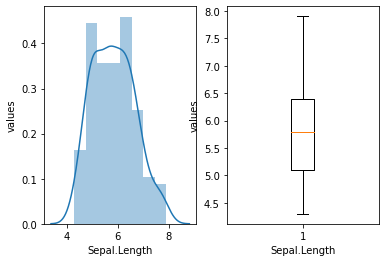

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


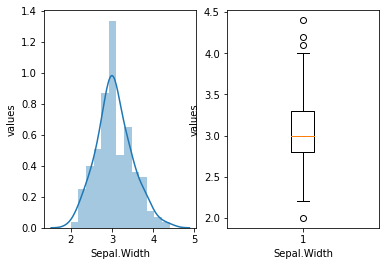

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


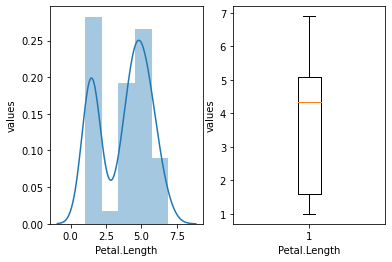

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


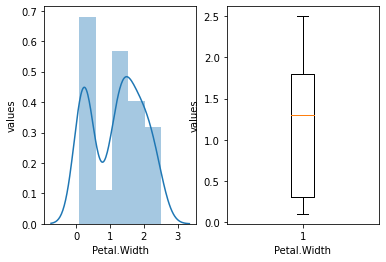

In [ ]:
# now we will proceed with Univariate analysis
# we will do univariate analysis by distplot/histogram and boxplot
import seaborn as sns

for i in cols:
  plt.subplot(1,2,1)
  sns.distplot(data[i])
  plt.xlabel(i)
  plt.ylabel('values')

  plt.subplot(1,2,2)
  plt.boxplot(data[i])
  plt.xlabel(i)
  plt.ylabel('values')
  plt.show()



In [ ]:
# Analysis:Sepal.Width has outlier and needs outlier treatment.
# Bivariate analysis
# Bivariate analysis can be done by correlation matrix

matrix = data.corr()
print(matrix)

              Sepal.Length  Sepal.Width  Petal.Length  Petal.Width   Species
Sepal.Length      1.000000    -0.117570      0.871754     0.817941  0.782561
Sepal.Width      -0.117570     1.000000     -0.428440    -0.366126 -0.426658
Petal.Length      0.871754    -0.428440      1.000000     0.962865  0.949035
Petal.Width       0.817941    -0.366126      0.962865     1.000000  0.956547
Species           0.782561    -0.426658      0.949035     0.956547  1.000000


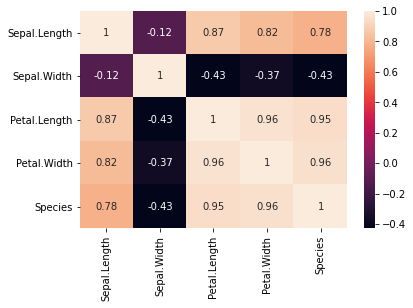

In [ ]:
sns.heatmap(matrix,annot=True)

In [ ]:
# Analysis:'Sepal.Width' is not related to Species
# towards building the model
# missing value treatment
data.isnull().sum()
# analysis:no missing value

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

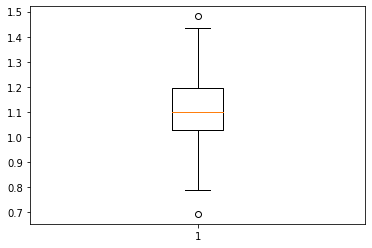

In [ ]:
# outlier tratment
data['Sepal.Width'] = np.log(data['Sepal.Width'])
plt.boxplot(data['Sepal.Width'])

plt.show()

In [ ]:
# towards building model
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [ ]:
# different models to be used for comparison
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

models = []
models.append(('LogisticRegression',LogisticRegression()))
models.append(("KNN",KNeighborsClassifier()))
models.append(('naive_bayes',GaussianNB()))
models.append(('svm',SVC()))
models.append(('decision tree',DecisionTreeClassifier()))

for name,model in models:
  cv_results = model_selection.cross_val_score(model,X_train,y_train,cv=20,scoring ='accuracy')
  cv_results = np.sqrt(abs(cv_results))
  
  print('model name:{0},CV mean :{1},CV std:{2}'.format(name,cv_results.mean(),cv_results.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Model Name:LogisticRegression,CV mean :0.9782177322938193,CV std:0.03772799437117189
Model Name:KNN,CV mean :0.9777554684226779,CV std:0.04824497178860393
Model Name:naive_bayes,CV mean :0.9738612787525831,CV std:0.0399275562285462
Model Name:svm,CV mean :0.9733990148814418,CV std:0.04994354640830876
Model Name:decision tree,CV mean :0.969504825211347,CV std:0.04155791812136842


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# we saw logistic regression performing better
# so proceeding with logistic regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)



[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


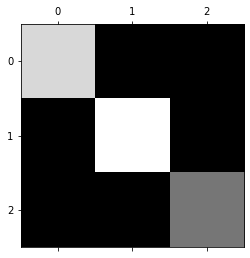

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve
cm = confusion_matrix(y_test,y_pred)
print(cm)
plt.matshow(cm,cmap=plt.cm.gray)
plt.show()

In [ ]:
print("accuracy score",accuracy_score(y_test,y_pred))


accuracy score 1.0
